<h1>EDA

In [107]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

file_path = "/users/bobbywilliams/dc-ds-060120/mod-1/Mod-1-project/zippeddata/"
df_imdb_title_basics = pd.read_csv(file_path + 'imdb.title.basics.csv.gz')
df_tn_movie_budgets = pd.read_csv(file_path + 'tn.movie_budgets.csv.gz')

In [2]:
#df_imdb_title_basics
    # tconst
    # primary_title
    # original_title
    # start_year
    # runtime_minutes
    # genres

# df_tn_movie_budgets
    # id
    # release_date
    # movie
    # production_budget
    # domestic_gross
    # worldwide_gross

In [3]:
df_imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [30]:
# split the genres column up
df_genres = df_imdb_title_basics['genres'].str.split(",", expand = True)
df_imdb_title_basics['genre_list'] = df_imdb_title_basics['genres'].str.split(",")
df_imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [4]:
df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
# Modify the budget and gross profit columns to be numeric
df_tn_movie_budgets['budget'] = df_tn_movie_budgets['production_budget'].map(lambda x: x.strip('$').replace(',','')).astype(float)
df_tn_movie_budgets['domestic_profit'] = df_tn_movie_budgets['domestic_gross'].map(lambda x: x.strip('$').replace(',','')).astype(float) - df_tn_movie_budgets['budget']
df_tn_movie_budgets['worldwide_profit'] = df_tn_movie_budgets['worldwide_gross'].map(lambda x: x.strip('$').replace(',','')).astype(float) - df_tn_movie_budgets['budget']

df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
budget               5782 non-null float64
domestic_profit      5782 non-null float64
worldwide_profit     5782 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 406.7+ KB


In [31]:
budget_by_genre = df_tn_movie_budgets.merge(df_imdb_title_basics, left_on='movie', right_on='primary_title', how = 'left')
budget_by_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 16 columns):
id                   7221 non-null int64
release_date         7221 non-null object
movie                7221 non-null object
production_budget    7221 non-null object
domestic_gross       7221 non-null object
worldwide_gross      7221 non-null object
budget               7221 non-null float64
domestic_profit      7221 non-null float64
worldwide_profit     7221 non-null float64
tconst               3815 non-null object
primary_title        3815 non-null object
original_title       3814 non-null object
start_year           3815 non-null float64
runtime_minutes      3328 non-null float64
genres               3743 non-null object
genre_list           3743 non-null object
dtypes: float64(5), int64(1), object(10)
memory usage: 959.0+ KB


In [32]:
budget_by_genre.dropna(subset=['genres'], inplace = True)
budget_by_genre.head()
#budget_by_genre.to_excel("/users/bobbywilliams/desktop/output.xlsx")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget,domestic_profit,worldwide_profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,335507625.0,2.351345e+09,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,[Horror]
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,-169536125.0,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,-307237650.0,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,128405868.0,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,378815482.0,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"


In [44]:
df_new = budget_by_genre[['tconst', 'release_date', 'domestic_profit', 'worldwide_profit', 'genre_list']]
#df_new.drop(columns = ['id', 'start_year'], inplace = True)
df_new['release_year'] = df_new['release_date'].str[-4:]
df_new['release_year'].astype(int)
df_new.drop(columns = ['release_date'], inplace = True)
#df_new['genres'] = df_new['genres'].astype(str)
#df_new[['release_year','release_day']] = df_new.release_date.str.split(", ",expand=True)
df_new.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tconst,domestic_profit,worldwide_profit,genre_list,release_year
0,tt1775309,335507625.0,2.351345e+09,[Horror],2009
1,tt1298650,-169536125.0,6.350639e+08,"[Action, Adventure, Fantasy]",2011
2,tt6565702,-307237650.0,-2.002376e+08,"[Action, Adventure, Sci-Fi]",2019
3,tt2395427,128405868.0,1.072414e+09,"[Action, Adventure, Sci-Fi]",2015
6,tt4154756,378815482.0,1.748134e+09,"[Action, Adventure, Sci-Fi]",2018


In [60]:
df_new = df_new.genre_list.apply(pd.Series) \
    .merge(df_new, left_index = True, right_index = True) \
    .drop(['genre_list'], axis = 1) \
    .melt(id_vars = ['tconst', 'release_year', 'domestic_profit', 'worldwide_profit'], value_name = 'genre_list') \
    .drop("variable", axis = 1) \
    .dropna()
df_new

,tconst,release_year,domestic_profit,worldwide_profit,genre_list
0,tt1775309,2009,335507625.0,2.351345e+09,Horror
1,tt1298650,2011,-169536125.0,6.350639e+08,Action
2,tt6565702,2019,-307237650.0,-2.002376e+08,Action
3,tt2395427,2015,128405868.0,1.072414e+09,Action
4,tt4154756,2018,378815482.0,1.748134e+09,Action
...,...,...,...,...,...
11221,tt2357398,2015,-20000.0,-2.000000e+04,Documentary
11222,tt1781935,2011,-17300.0,-1.730000e+04,Thriller
11224,tt6619196,2006,128711.0,1.287110e+05,Horror
11227,tt7837402,2018,-7000.0,-7.000000e+03,Thriller


In [103]:
df_new.rename(columns={"genre_list": "genre"}, inplace = True)
df_new['genre'].value_counts()

Drama          1817
Comedy          842
Action          710
Thriller        594
Documentary     499
Adventure       490
Horror          415
Crime           398
Romance         372
Mystery         249
Biography       248
Sci-Fi          229
Family          204
Fantasy         202
Animation       148
History          96
Music            87
Sport            75
War              53
Musical          35
Western          25
News              7
Reality-TV        1
Name: genre, dtype: int64

In [122]:
#df_1 = df_new.groupby(['release_year', 'genre_list']).mean()
df_new['domestic_profit'] = df_new['domestic_profit']/1000000
df_new['worldwide_profit'] = df_new['worldwide_profit']/1000000
df_new['profit'] = df_new['domestic_profit'] + df_new['worldwide_profit']
df_domestic = df_new.groupby(['release_year','genre']).mean()['domestic_profit'].unstack()
df_worldwide = df_new.groupby(['release_year','genre']).mean()['worldwide_profit'].unstack()
df_profit = df_new.groupby(['release_year','genre']).mean()['profit'].unstack()
#df_1 = df_1.sort_values(by=['release_year'], ascending=False)
df_domestic = df_domestic.tail(6)
df_worldwide = df_worldwide.tail(6)
df_profit = df_profit.tail(6)
#df_1.drop(df.tail(1).index,inplace=True)
df_domestic

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,,
2015,-4.469401e-73,1.339593e-71,5.868298e-71,1.321530e-71,1.161552e-71,-2.872719e-72,1.729780e-71,7.168148e-72,1.884808e-71,8.501778e-72,...,4.745455e-71,2.020305e-72,-2.962849e-72,NaN,4.917160e-72,2.648850e-71,2.532841e-72,4.106379e-72,-5.566970e-72,-4.466763e-71
2016,3.455951e-72,2.622333e-71,7.448764e-71,5.199892e-72,2.884738e-71,7.556036e-73,1.972791e-73,1.956003e-72,2.544441e-71,-6.103103e-72,...,NaN,2.183383e-71,NaN,-1.000000e-72,1.235244e-72,3.971086e-71,-2.974360e-72,1.043637e-72,-1.789841e-71,-1.268452e-71
2017,-1.795441e-72,3.477443e-72,1.817946e-71,-1.589818e-72,1.914780e-71,8.701029e-72,2.295726e-72,8.419437e-72,1.497951e-70,3.870958e-71,...,2.594562e-70,1.927580e-71,NaN,NaN,2.210409e-71,4.509867e-72,1.257644e-70,1.050488e-71,-1.548168e-71,NaN
2018,2.916379e-71,2.770210e-71,5.215574e-71,1.623278e-71,2.857649e-71,6.059523e-72,5.888119e-71,1.067789e-71,-3.495358e-72,-3.989438e-72,...,NaN,6.415944e-72,NaN,NaN,3.636382e-71,6.195513e-71,4.509292e-71,2.108564e-71,8.114170e-73,NaN
2019,-2.981986e-71,-2.597944e-71,-8.484867e-72,-7.824267e-72,7.696555e-72,2.794987e-72,-2.795002e-71,1.177021e-71,-2.327289e-71,-1.385796e-71,...,NaN,2.108630e-71,NaN,NaN,2.118133e-71,9.391260e-73,NaN,1.730417e-71,NaN,NaN
2020,NaN,-8.200000e-71,-8.200000e-71,NaN,NaN,NaN,NaN,NaN,-8.200000e-71,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df_worldwide

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,,
2015,0.000089,0.000166,0.000284,0.000069,0.000065,0.000044,0.000083,0.000043,0.000137,0.000080,...,0.000186,0.000016,-0.000003,NaN,0.000033,0.000175,0.000024,0.000054,3.014468e-05,-0.000041
2016,0.000123,0.000233,0.000341,0.000034,0.000115,0.000027,0.000029,0.000036,0.000172,0.000218,...,NaN,0.000059,NaN,-0.000001,0.000038,0.000244,0.000008,0.000036,-6.631316e-06,0.000011
2017,0.000187,0.000213,0.000203,0.000030,0.000122,0.000106,0.000043,0.000063,0.000498,0.000283,...,0.000834,0.000088,NaN,NaN,0.000090,0.000200,0.000299,0.000102,-1.520426e-05,NaN
2018,0.000215,0.000237,0.000208,0.000086,0.000096,0.000031,0.000121,0.000051,0.000112,0.000153,...,NaN,0.000034,NaN,NaN,0.000085,0.000343,0.000096,0.000123,8.883050e-07,NaN
2019,0.000100,0.000128,0.000107,0.000001,0.000068,0.000030,-0.000025,0.000038,0.000131,0.000156,...,NaN,0.000058,NaN,NaN,0.000042,0.000200,NaN,0.000049,NaN,NaN
2020,NaN,-0.000082,-0.000082,NaN,NaN,NaN,NaN,NaN,-0.000082,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df_profit

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,,
2015,8.915064e-11,1.655198e-10,2.835840e-10,6.873074e-11,6.496733e-11,4.429765e-11,8.326283e-11,4.313398e-11,1.370339e-10,8.007226e-11,...,1.855768e-10,1.583220e-11,-2.516062e-12,NaN,3.317062e-11,1.747198e-10,2.362325e-11,5.437342e-11,3.014468e-11,-4.070289e-11
2016,1.232115e-10,2.330368e-10,3.409600e-10,3.384500e-11,1.149933e-10,2.664264e-11,2.933227e-11,3.606702e-11,1.723858e-10,2.181997e-10,...,NaN,5.906127e-11,NaN,-1.000000e-12,3.849433e-11,2.438427e-10,7.700167e-12,3.616557e-11,-6.631316e-12,1.109883e-11
2017,1.869781e-10,2.133519e-10,2.034048e-10,2.957113e-11,1.223540e-10,1.057378e-10,4.275935e-11,6.348335e-11,4.975631e-10,2.833136e-10,...,8.336883e-10,8.769045e-11,NaN,NaN,9.038858e-11,2.004670e-10,2.994624e-10,1.017328e-10,-1.520426e-11,NaN
2018,2.149560e-10,2.365085e-10,2.080067e-10,8.647410e-11,9.563681e-11,3.086619e-11,1.208583e-10,5.116805e-11,1.119639e-10,1.529594e-10,...,NaN,3.436382e-11,NaN,NaN,8.522445e-11,3.433748e-10,9.605934e-11,1.232717e-10,8.883050e-13,NaN
2019,9.954488e-11,1.277356e-10,1.065303e-10,1.282657e-12,6.761312e-11,3.037121e-11,-2.468439e-11,3.825742e-11,1.305218e-10,1.564306e-10,...,NaN,5.839324e-11,NaN,NaN,4.237578e-11,2.002525e-10,NaN,4.891419e-11,NaN,NaN
2020,NaN,-8.200000e-11,-8.200000e-11,NaN,NaN,NaN,NaN,NaN,-8.200000e-11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Domestic Profit')

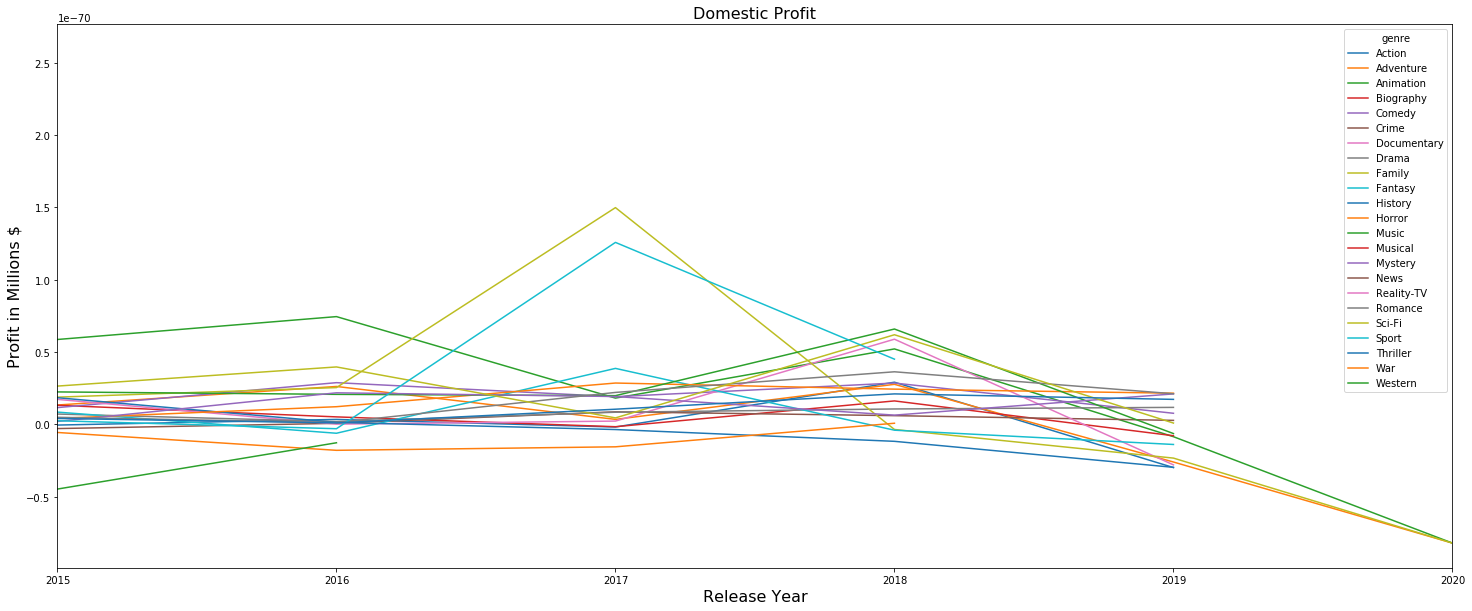

In [130]:
df_domestic.plot.line(figsize=(25,10))
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Profit in Millions $', fontsize=16)
plt.title('Domestic Profit', fontsize=16)

Text(0.5, 1.0, 'Worldwide Profit')

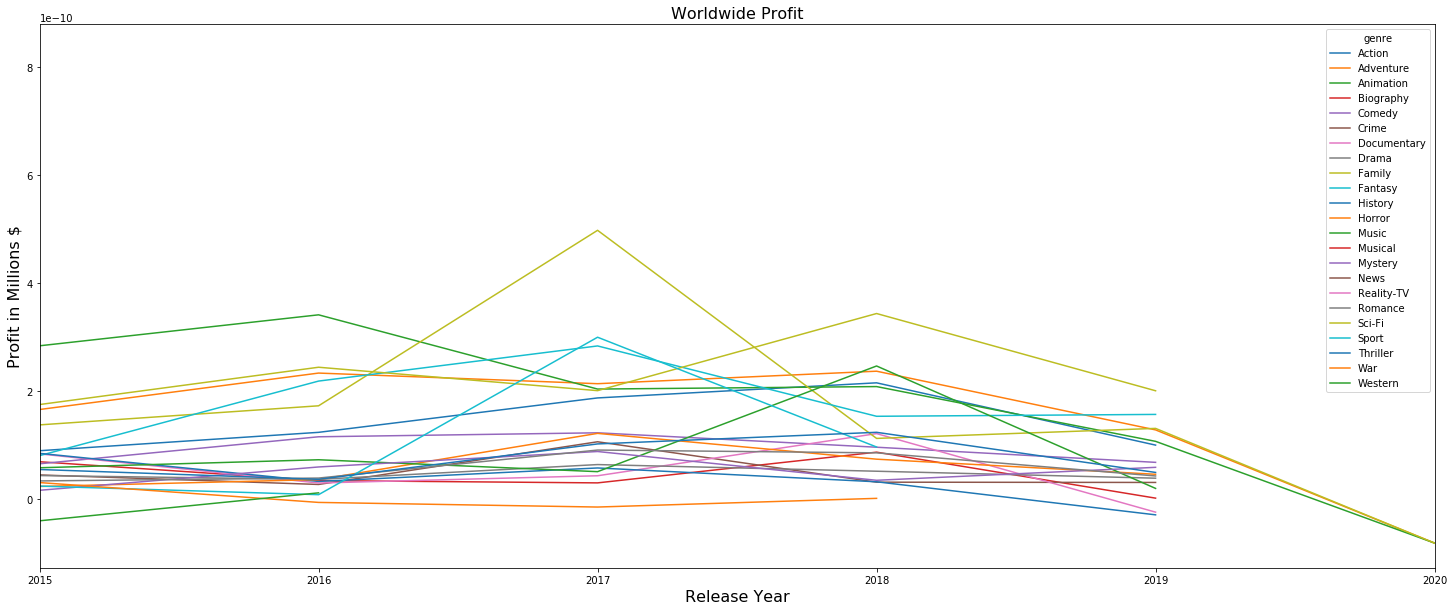

In [131]:
df_worldwide.plot.line(figsize=(25,10))
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Profit in Millions $', fontsize=16)
plt.title('Worldwide Profit', fontsize=16)

Text(0.5, 1.0, 'Total Profit')

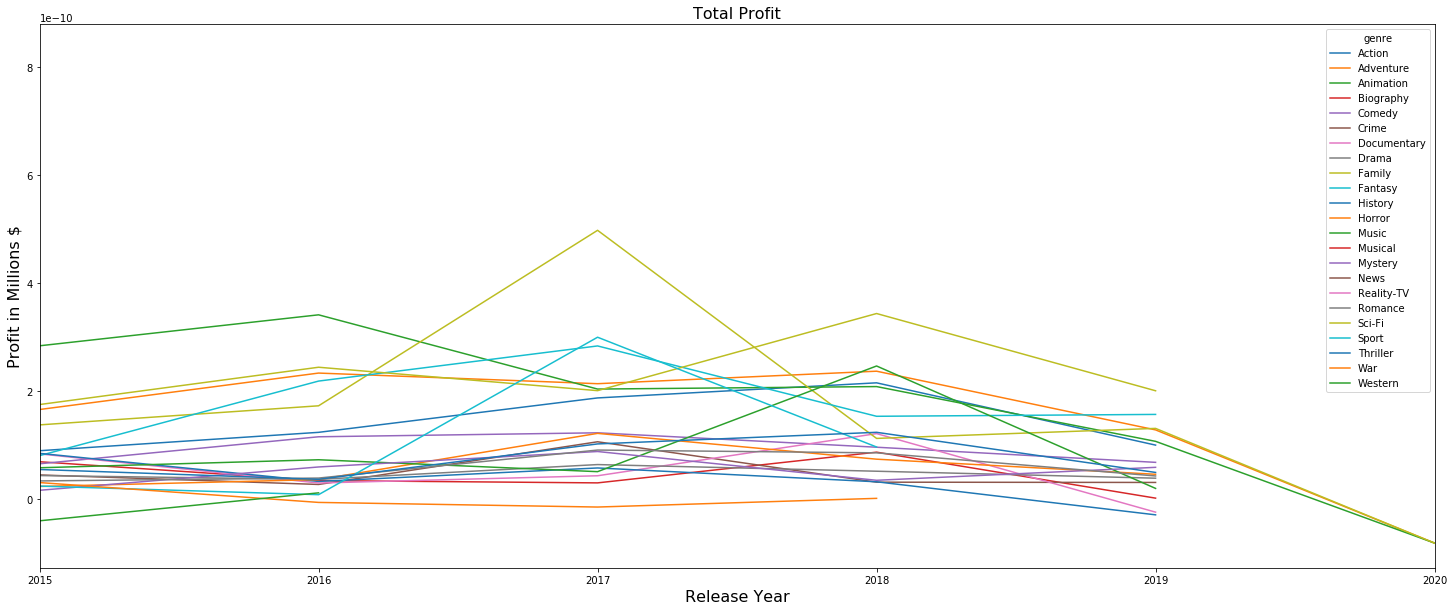

In [132]:
df_profit.plot.line(figsize=(25,10))
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Profit in Millions $', fontsize=16)
plt.title('Total Profit', fontsize=16)

In [103]:
# Create a new df grouped by release year and genre while collecting the profit means
#df_1 = df_new.groupby(['release_year', 'genres']).mean()
df_1 = df_new.groupby(['release_year']).mean()

# Drop the 'id' column
#df_1.drop(columns = 'id', inplace = True)

# Sort the dataframe by the release year, descending
df_1 = df_1.sort_values(by=['release_year'], ascending=False)
df_1.head()

,domestic_profit,worldwide_profit
release_year,,
2020,-8.200000e+07,-8.200000e+07
2019,1.599262e+06,6.523984e+07
2018,2.330766e+07,1.186619e+08
2017,1.165159e+07,1.081754e+08
2016,9.017631e+06,7.804776e+07
